In [43]:
# Essential Libraries

import pandas as pd
import numpy as np

# Visualizing NaN values

import missingno as msno

# Visualization

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Calendar

import calendar


import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyRegressor

# ML selecao de dados de treino e teste
from sklearn.model_selection import train_test_split
# calcular o menor erro medio absoluto entre 2 dados apresentados
from sklearn.metrics import mean_absolute_error


# Plotly Options and Config

pio.templates.default = 'plotly_white'
config = {'displayModeBar': False}
colors_x = ['#E0C95A', '#CBE0CA', '#E0864E', '#CDCCE3', '#E3B8D1']
cmaps = 'Blues'

In [3]:
# custom colors

blue_shades =[
    '#004FD6',
    '#005DFC',
    '#0058F0',
    '#002970',
    '#0041B0',
    '#003C61'
]

# Yellow - Compliment
blue_shades_y =[
    '#004FD6',
    '#005DFC',
    '#0058F0',
    '#002970',
    '#0041B0',
    '#003C61',
    # Yellow Highlight [6]
    '#F0DD18', 
]

green_shades = [
    '#9BF018',
    '#48700B',
    '#99F018',
    '#A2FC19',
    '#89D615',
    '#5A8C0E',
    # Yellow Highlight [6]
    '#F0DD18'
]

scatter_con = [
    '#000A1C',
    '#001C4D',
    '#003185',
    '#2FCA56',
    '#D8CCCC'
]

In [4]:
# Importing our dataframe using pandas

market = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

# Changeing column names

market.columns = market.columns.str.lower().str.replace(' ', '_')

In [33]:
## Checking for null values 
market.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
datetime                   0
dtype: int64

In [7]:
print(f'>> Dataframe shape: {market.shape}')
print(f'>> DataFrame size: {market.size}')

>> Dataframe shape: (1000, 17)
>> DataFrame size: 17000


In [9]:
market.describe().style.background_gradient(cmap = cmaps)

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


Cutomer profiling may prove difficult because our dataset needs a bit more demographic features. However, we can still profile our customers in low resolution.Customer profiling can prove to be helpful in business. It tries to gain inference as to 

- Who are buying our proudcts.
- what is the perceived value of our products.


In [11]:
def query_market_is(col, look):
    """
    Easy == Query
    """
    query_to_return = market.query('{} == "{}"'.format(col, look))
    return query_to_return

def percentage(s):
    """
    Converts a series to round off - percentage string format.
    """
    x = s.apply(lambda x : round(x/s[:].sum() * 100, 2))
    x = x.apply(lambda x : str(x) + '%')
    return x

<div class="alert alert-block alert-info"><b>Note:</b> I used the function above to turn percentages to text, so that it can help me with visualizing text percentages in using plotly graph_objects. 
</div>

In [12]:
gender_count = market['gender'].value_counts()
gp = percentage(gender_count)

fig = go.Figure()

fig.add_trace(go.Bar(
    x = gender_count.index,
    y = gender_count,
    text = [f'{gp[0]}👧', f'{gp[1]}👨'],
    textfont = dict(size = 13),
    marker_color = [blue_shades[5], blue_shades[0]]
))

fig.update_traces(
    textposition = 'outside'
)

fig.update_layout(
    xaxis_title = '<b>Gender</b>',
    yaxis_title = 'Count',
    title = '<b>Gender:</b> Male and Female Count',
    autosize = False,
    height = 600,
)

fig.show()

In [14]:
# Preparing the Data Frame

gender_customer_type = market.groupby(['gender', 'customer_type']).size()

# Non-member - Gender, Variable Counts

male_normal = gender_customer_type.loc['Male', 'Normal']
female_normal = gender_customer_type.loc['Female', 'Normal']

# Member - Gender, Variable Counts

male_member = gender_customer_type.loc['Male', 'Member']
female_member = gender_customer_type.loc['Female', 'Member']

total_non_member =  male_normal + female_normal
total_member = male_member + female_member

# Percentage 

male_normal_percentage = str(round(male_normal / total_member * 100, 2)) + '%'
female_normal_percentage = str(round(female_normal / total_member * 100, 2)) + '%'

male_member_percentage = str(round(male_member / total_member * 100, 2)) + '%'
female_member_percentage = str(round(female_member / total_member * 100, 2)) + '%'

# Create Subplot

fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [1, 1],
    specs = [[{'type' : 'bar'},{'type' : 'bar'}]]
)

# Member - Gender, Trace

fig.add_trace(go.Bar(
    x = ['Male', '<b>Female 👧🏆</b>'],
    y = [male_member, female_member],
    #marker_color = colors_a,
    name = 'Member',
    text = [male_member_percentage, female_member_percentage],
    marker_color = blue_shades
), row = 1, col = 1)

# Normal - Gender, Trace

fig.add_trace(go.Bar(
    x = ['<b>Male</b>','Female'],
    y = [male_normal, female_normal],
    name = 'Non-member',
    text = [male_normal_percentage, female_normal_percentage],
    marker_color = 'darkgray'#green_shades
), row = 1, col = 2)


# Update traces (Text)

fig.update_traces(
    textposition = 'inside'
)

fig.update_layout(
    title =  '<b> Gender-Membership </b> Who availed for a membership?',
    yaxis_title = 'Count',
    xaxis_title = 'Gender',
    autosize = False,
    height = 400
)

fig.show(config=config)

<b>Gender Membership:</b>
Combing both feature, what gender availed the most of our membership offers? <b> Membership </b> can either mean customer loyalty for some businessmen.
It can show how customers are interested in buying future products from your store. <br>Retaining loyal customers are beneficial for your business in the long-run as it can help predict future sales.

The figure below shows that majority of the <b> women </b> availed for membership. While on the other hand male customers has the majority for non-members.

In [15]:
# Query

female_member_product = market.query('gender == "Female" & customer_type == "Member"')
female_normal_product = market.query('gender == "Female" & customer_type == "Normal"')

# Count

f_m_product_line = female_member_product.product_line.unique()
f_m_product_counts = female_member_product.product_line.value_counts()
f_n_product_line = female_normal_product.product_line.unique()
f_n_product_counts = female_normal_product.product_line.value_counts()

# Percentage

cumulative_pv = female_member_product.product_line.value_counts(normalize = True).cumsum()*100
cumulative_pv_norm = female_normal_product.product_line.value_counts(normalize = True).cumsum()*100

# Create subplot

fig = make_subplots(rows = 1, cols = 2, specs=[[{"secondary_y": True}, {"secondary_y": True}]],
                   subplot_titles = ("<b>Member Purchase</b>", "<b>Non-Member Purchase</b>"))

# Male-Member Traces

fig.add_trace(go.Bar(
    x = f_m_product_line,
    y = f_m_product_counts,
    name = 'Member-Purchase',
    marker_color = blue_shades,
    text = ['🎖', '🎖', '🎖'],
), row = 1, col = 1, secondary_y = False)

fig.add_trace(go.Scatter(
    x = f_m_product_line,
    y = cumulative_pv,
    name = 'Cumulative Percentage',
    marker_color = 'black'#'yellow'
), row = 1, col = 1, secondary_y = True)

# Male-Normal Traces

fig.add_trace(go.Bar(
    x = f_n_product_line,
    y = f_n_product_counts,
    name = 'Non-Member-Purchase',
    marker_color = 'gray',#green_shades,
    text = ['🎖', '🎖'],
), row = 1, col = 2, secondary_y = False)

fig.add_trace(go.Scatter(
    x = f_n_product_line,
    y = cumulative_pv_norm,
    name = 'Cumulative Percentage',
    marker_color = 'black'#'yellow'
), row = 1, col = 2, secondary_y = True)


fig.update_xaxes(title_text = '<b>Product Line</b>')
fig.update_yaxes(title_text = 'Frequency', secondary_y = False)
fig.update_yaxes(title_text = 'Cumulative Frequency (%)', secondary_y = True)
fig.update_layout(title = '<b>Gender-Product</b>: What Products do <b>👧 Women</b> buy?',
                  xaxis=dict(tickangle = -90), xaxis2 = dict(tickangle = -90), 
                  paper_bgcolor = '#FFEDFF',
                  plot_bgcolor = '#FFEDFF',
                  showlegend = False
)
fig.show()

<b> Gender Product: </b>  What  do women buy? <br>
The chart above tells us that for women who are members made use of their membership benefits in purchasing. <br>
<b>The top 3 Member  Purchase:</b>
1. Health  and Beauty
2. Electronic Accessories
3. Food and Beverages

<b>The top 3 Non-member Purchase: </b>
1. Electronic Accessories
2. Home and Lifestyle
3. Health and Beauty

In [16]:
# Query

male_member_product = market.query('gender == "Male" & customer_type == "Member"')
male_normal_product = market.query('gender == "Male" & customer_type == "Normal"')


# Count

m_m_product_line = male_member_product.product_line.unique()
m_m_product_counts = male_member_product.product_line.value_counts()
m_n_product_line = male_normal_product.product_line.unique()
m_n_product_counts = male_normal_product.product_line.value_counts()

# Percentage

cumulative_pv = male_member_product.product_line.value_counts(normalize = True).cumsum()*100
cumulative_pv_norm = male_normal_product.product_line.value_counts(normalize = True).cumsum()*100

# Create subplot

fig = make_subplots(rows = 1, 
                    cols = 2, 
                    column_widths = [5, 5], 
                    shared_yaxes = True, 
                    specs=[[{"secondary_y": True}, {"secondary_y": True}]],
                    subplot_titles = ("<b>Member Purchase</b>", "<b>Non-Member Purchase</b>")
)

# Male-Member Traces

fig.add_trace(go.Bar(
    x = m_m_product_line,
    y = m_m_product_counts,
    name = 'Member-Purchase',
    marker_color = blue_shades,
    text = ['🎖', '🎖', '🎖'],
), row = 1, col = 1, secondary_y = False)

fig.add_trace(go.Scatter(
    x = m_m_product_line,
    y = cumulative_pv,
    name = 'Cumulative Percentage',
    marker_color = 'black'#'yellow' 
), row = 1, col = 1, secondary_y = True)

# Male-Normal Traces

fig.add_trace(go.Bar(
    x = m_n_product_line,
    y = m_n_product_counts,
    name = 'Non-Member-Purchase',
    marker_color = 'gray',#green_shades,
    text = ['🎖', '🎖'],
), row = 1, col = 2, secondary_y = False)

fig.add_trace(go.Scatter(
    x = m_n_product_line,
    y = cumulative_pv_norm,
    name = 'Cumulative Percentage',
    marker_color = 'black'#'yellow'
), row = 1, col = 2, secondary_y = True)


fig.update_xaxes(title_text = '<b>Product Line</b>')
fig.update_yaxes(title_text = 'Frequency', secondary_y = False)
fig.update_yaxes(title_text = 'Cumulative Frequency (%)', secondary_y = True)
fig.update_layout(title = '<b>Gender-Product</b>: What Products do <b>👨 Men</b> buy?', 
                  xaxis=dict(tickangle = -90), xaxis2 = dict(tickangle = -90), 
                  paper_bgcolor = '#F2F2FF',
                  plot_bgcolor = '#F2F2FF',
                  showlegend = False
)

fig.show(config=config)

<b> Gender Product: </b>  What  do men buy? <br>
The chart above tells us that for men who are members made use of their membership benefits in purchasing. <br>
<b>The top 3 Member  Purchase:</b>
1. Health  and Beauty
2. Electronic Accessories
3. Sports and Travel

<b>The top 3 Non-member Purchase: </b>
1. Home and Lifestyle
2. Sports  and Travel
3. Electronic Accessories

In [18]:
# Count

payment_whole_count = market.payment.value_counts()

# Label

payment_whole_label = market.payment.unique()

# Colors

colors_c = ['#E30E3F', '#E3D724', '#4249D4']

# General Payment Method Count - Pie Figure

fig = go.Figure(data=[
    go.Pie(
    labels=payment_whole_label, 
    values=payment_whole_count, 
    pull=[0.07, 0, 0])
])

fig.update_traces(hoverinfo = 'label+percent', 
                  textinfo = 'label+percent', 
                  textfont_size = 12,
                  marker = dict(colors = blue_shades[0:2]))

fig.update_layout(autosize = True, title = '<b>Payment Method:</b> What is the 💵 payment method used in general?')
fig.show(config=config)

In [19]:
market['datetime'] = market['date'] + ' ' + market['time']
market['datetime'] = pd.to_datetime(market['datetime'])

from pandas.api.types import CategoricalDtype

# Months

datetime_month = market['datetime'].dt.month
dt_month_cat = datetime_month.astype('category')
dt_month_cat = dt_month_cat.cat.rename_categories({
    1 : 'January',
    2 : 'February',
    3 : 'March'
})

datetime_time_frame = pd.concat([market['datetime'], dt_month_cat], axis = 1, ignore_index = True)
datetime_time_frame = datetime_time_frame.rename(columns = {0 : 'datetime', 1 : 'month'})

# Day of Week

dt_week = market['datetime'].dt.weekday
dt_week_cat = dt_week.astype('category')
dt_week_cat = dt_week_cat.cat.rename_categories({
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
})


# Inserting other features to groupby

datetime_time_frame = pd.concat([datetime_time_frame, market['gross_income'], market['rating']], axis = 1)
datetime_time_frame.head()

datetime_time_frame['branch'] = market['branch']
datetime_time_frame.head()

# Preparing DataFrame

m_b_income_r = datetime_time_frame.groupby(by = ['month', 'branch']).mean()

# Hours

datetime_time_frame['hours'] = datetime_time_frame['datetime'].dt.hour
datetime_time_frame.head()
datetime_time_frame['weekday'] = dt_week_cat
datetime_time_frame.head()



,datetime,month,gross_income,rating,branch,hours,weekday
0,2019-01-05 13:08:00,January,26.1415,9.1,A,13,Saturday
1,2019-03-08 10:29:00,March,3.8200,9.6,C,10,Friday
2,2019-03-03 13:23:00,March,16.2155,7.4,A,13,Sunday
3,2019-01-27 20:33:00,January,23.2880,8.4,A,20,Sunday
4,2019-02-08 10:37:00,February,30.2085,5.3,A,10,Friday


In [20]:
# Checking Leap Year

calendar.isleap(2019)

False

In [21]:
# Preparing the Dataframe

month_frequency = datetime_time_frame.groupby(by = ['month']).size()

# Percentage 

month_p = percentage(month_frequency)

#Creating figure

fig = go.Figure()

# Add traces

fig.add_trace(go.Bar(
    x = month_frequency.index,
    y = month_frequency.values,
    text = [f'<b>{month_p[0]}🏆</b>', month_p[1], month_p[2]],
    marker_color = [blue_shades_y[6], blue_shades[0], blue_shades[1]]
))

fig.update_traces(
    textposition = 'inside'
)

fig.update_layout(
    title = '📅 Which month was the busiest?',
    xaxis_title = '<b>Month</b>',
    yaxis_title = 'Frequency'
)


fig.show()

<h3 style="color: #B0E0E6; background-color: #003699;">
⏲ Hour
<br>
</h3>

In [22]:
# Preparing dataframe
branch_hours = datetime_time_frame.groupby(by = ['branch', 'hours']).size()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = branch_hours['A'].index,
    y = branch_hours['A'].values,
    name = 'Branch A',
    fill='tozeroy',
    mode = 'none',
    fillcolor = 'rgba(0,40,80,0.4)'
))

fig.add_trace(go.Scatter(
    x = branch_hours['B'].index,
    y = branch_hours['B'].values,
    name = 'Branch B',
    fill='tozeroy',
    mode = 'none',
    fillcolor = 'rgba(0,70,50,0.4)'
))

fig.add_trace(go.Scatter(
    x = branch_hours['C'].index,
    y = branch_hours['C'].values,
    name = 'Branch C',
    fill='tozeroy',
    mode = 'none',
    fillcolor = 'rgba(50,10,50,0.4)'
))

fig.update_layout(
    xaxis_title = 'Hour (24:00 Format)',
    yaxis_title = 'Frequency',
    title = 'What<b> hour</b> of the day is the busiest?',
)

fig.update_xaxes(
    nticks = 20
)

fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="yellow")

fig.show()

In [26]:
# Preparing Data Frame
product_price = market[['product_line','unit_price']]

# Queries

hb = product_price.query('product_line == "Health and beauty"')
ea = product_price.query('product_line == "Electronic accessories"')
hl = product_price.query('product_line == "Home and lifestyle"')
st = product_price.query('product_line == "Sports and travel"')
fb = product_price.query('product_line == "Food and beverages"')
fa = product_price.query('product_line == "Fashion accessories"')

# Loop Variable

product_line_box = [hb, ea, hl, st, fb, fa]

# Create Figure Loop

fig = go.Figure()
N = 6
blue_shades =[
    '#004FD6',
    '#005DFC',
    '#0058F0',
    '#002970',
    '#0041B0',
    '#003C61'
]
i = 0
for x in product_line_box:
    fig.add_trace(go.Box(
        y = x.unit_price,
        name = str(x['product_line'].unique()).strip("[]'"),
        boxmean = True,
        boxpoints = 'all',
        jitter = 0.4,
        pointpos = -2,
        fillcolor = blue_shades[i]
    ))
    i+=1

fig.update_traces(
    marker = dict(color = 'black')
)
fig.update_layout(
    title = '<b>Product-Price:</b> What is the distribution of our unit price per product?',
    yaxis_title = 'Unit Price',
    xaxis = dict(tickangle = -90),
    height = 600
)

fig.show()

<h2>
Rating
<br>
</h2>

In [27]:
# Query
a_vals = market.query('branch == "A"')
b_vals = market.query('branch == "B"')
c_vals = market.query('branch == "C"')

branch_rating_vals = [a_vals, b_vals, c_vals]

# Add Figure
fig = go.Figure()

i = 0

for val in branch_rating_vals:
    fig.add_trace(go.Box(
        y = val.rating,
        name = str(val.branch.unique()).strip("[]'"),
        boxpoints = 'all',
        fillcolor = blue_shades[i]
    ))
    i += 1
    
fig.update_traces(
    marker = dict(color = 'black')
)
fig.update_layout(title = '<b>Branch-Rating</b>', xaxis_title = 'Branch', yaxis_title = 'Rating')
fig.show()


In [31]:
contour_colors  = 'blues'

fig = make_subplots(rows = 1, cols = 3, specs = [[{'type': 'xy'}, {'type' : 'xy'}, {'type': 'xy'}]],
                   subplot_titles = ('Branch A', 'Branch B', 'Branch C'))

fig.add_trace(go.Histogram2dContour(
    y = a_vals.rating,
    x = datetime_time_frame.hours,
    colorscale = scatter_con,
    name = 'Branch A'
), row = 1, col = 1)

fig.add_trace(go.Histogram2dContour(
    y = b_vals.rating,
    x = datetime_time_frame.hours,
    colorscale = scatter_con,
    name = 'Branch B',
), row = 1, col = 2)

fig.add_trace(go.Histogram2dContour(
    y = c_vals.rating,
    x = datetime_time_frame.hours,
    colorscale = scatter_con,
    name = 'Branch C',
), row = 1, col = 3)


fig.update_layout(
    autosize = False,
    height = 700,
    width = 1500,
    title = '<b>Rating - Time</b>: Finding Patterns in Density',
    xaxis_title = '<b>Time of the Day</b>',
    yaxis_title = '<b>Rating</b>'
)

fig.update_traces(
    line_smoothing = 0,
    colorbar_title = 'Rating',
    contours_showlines = False,
    showscale = False
)

fig.show()

In [46]:
#removing outliers 
def removeOutliers(out, varTarget):
    print('\nOutliers\nRemoving ...', end='')
    cidgrp = out[varTarget]
    print('..', end='')
    # quantiles
    qtl1 = cidgrp.quantile(.25)  
    qtl3 = cidgrp.quantile(.75)
    print('..', end='')
    # calculating iqr
    iqr = qtl3 - qtl1
    print('..', end='')

    # creating limits
    baixo = qtl1 - 1.5 * iqr
    alto = qtl3 + 1.5 * iqr
    print('..', end='')

    # removing outliers
    novodf = pd.DataFrame()
    print('..', end='')

    limites = out[varTarget].between(left=baixo, right=alto, inclusive=True)
    novodf = pd.concat([novodf, out[limites]])

    print('.....Done')

    return novodf

In [47]:
noOut = removeOutliers(market, varTarget)


Outliers
Removing ..................Done


forcasting model 

In [39]:
def correlation(dfA, varT, minValue=0.5, showGraphic=True, title='Correlation between variables'):
    corr = dfA.corr()
    print(f'\nAnalysing features:\n'
          f'Target: {varT}\n'
          f'minValue de ref.: {minValue}\n'
          f'\nMain Features:')
    corrs = corr[varT]
    features = []
    for i in range(0, len(corrs)):
        if corrs[i] > minValue and corrs.index[i] != varT:
            print(corrs.index[i], f'{corrs[i]:.2f}')
            features.append(corrs.index[i])
    if showGraphic:
        fig = plt.subplots(figsize=(15,8))
        sns.heatmap(corr,
                    annot=True, fmt='.2f', vmin=-1, vmax=1, linewidth=0.01,
                    linecolor='black', cmap='RdBu_r'
                    )
        plt.title(title)
        plt.show()
    
    return features



Analysing features:
Target: quantity
minValue de ref.: 0.5

Main Features:
tax_5% 0.71
total 0.71
cogs 0.71
gross_income 0.71


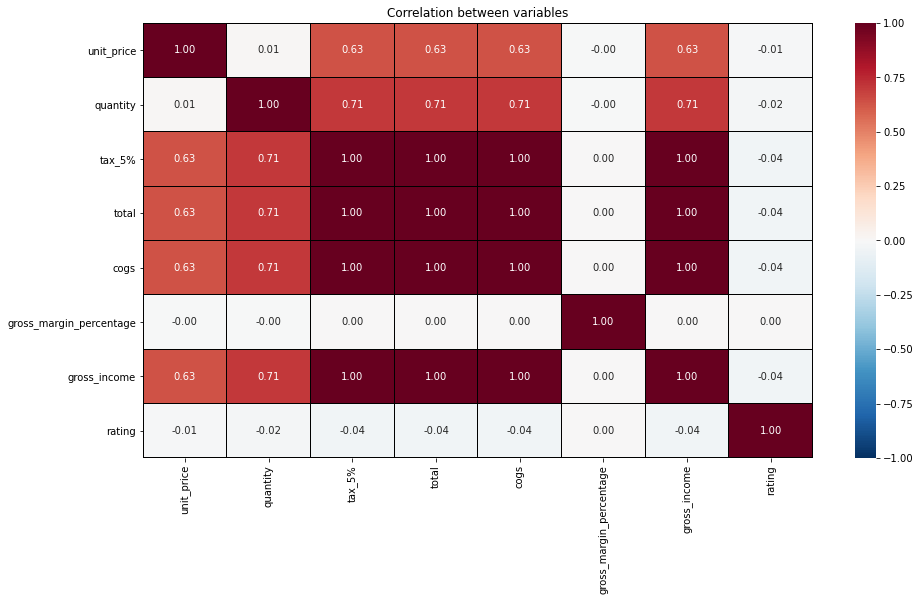

In [42]:
varTarget = 'quantity'
varFeatures = correlation(dfA=market, varT=varTarget)

In [44]:
regressors = [
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        SVR(),
        LinearRegression(),
        GradientBoostingRegressor(),
        PoissonRegressor(),
        DummyRegressor(),
        LogisticRegression(),
        GaussianNB()
    ]

In [48]:
X = noOut[varFeatures]
y = noOut[varTarget]
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size=0.3, random_state=123)

In [49]:
reg = []
mae = []
sco = []
for regressor in regressors:
    modelo = RandomForestRegressor()
    modelo.fit(Xtreino, np.array(ytreino))
    sco.append(modelo.score(Xtreino, ytreino))
    previsao = modelo.predict(Xteste)
    mae.append(round(mean_absolute_error(yteste, previsao), 2))
    reg.append(regressor)

In [50]:
meuMae = pd.DataFrame(columns=['Regressor', 'mae', 'score'])
meuMae['Regressor'] = reg
meuMae['mae'] = mae
meuMae['score'] = sco

In [51]:
meuMae = meuMae.sort_values(by='score', ascending=False)
meuMae

,Regressor,mae,score
8,GaussianNB(),1.84,0.917638
4,GradientBoostingRegressor(),1.85,0.917579
6,DummyRegressor(),1.85,0.917502
5,PoissonRegressor(),1.85,0.917234
2,SVR(),1.84,0.916872
3,LinearRegression(),1.84,0.916584
0,DecisionTreeRegressor(),1.85,0.916298
1,RandomForestRegressor(),1.84,0.915881
7,LogisticRegression(),1.84,0.915851


In [59]:
f'Best Regressor: {meuMae["Regressor"].values[0]}'

'Best Regressor: GaussianNB()'